This is the final notebook of the project. I am merging the two data frames I made from my api data and my web scraping. In the first cell I am importing all of the necessary libraries and packages I will use in this notebook to analyze the merged data. 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Once the packages were imported, I then moved on to reading in the data and doing a bit of a longer df.head so I could see how the data looked for each of my data sets. 

In [11]:
#reading .csv of tcgplayer-scaper notebook 
scraped_data = pd.read_csv('fab_scraped_data.csv')
#using pandas functions to rename columns so match the other data set and potentially merge on them
scraped_data.rename(columns={'rarity':'rarity', 'product':'name'}, inplace = True)
scraped_data.head(15)


,name,rarity,number,market price,listed median
0,Alluring Inducement,Majestic,DTD215,$0.75,—
1,Angelic Descent (Blue),Common,DTD034,$0.13,—
2,Angelic Descent (Red),Common,DTD032,$0.10,—
3,Angelic Descent (Yellow),Common,DTD033,$0.16,—
4,Angelic Wrath (Blue),Common,DTD037,$0.12,—
5,Angelic Wrath (Red),Common,DTD035,$0.10,—
6,Angelic Wrath (Yellow),Common,DTD036,$0.15,—
7,Anthem of Spring,Majestic,DTD196,$0.61,—
8,Banneret of Courage,Majestic,DTD048,$2.67,—
9,Banneret of Gallantry,Majestic,DTD049,$2.50,—


While reading the data in I noticed the best column to merge the data was called sku in this dataframe and number in the other. So, I changed the name of sku to number here and changed the number column here to set_number. I also tried using string split functions to make the values in the rows of the number column only what you see below, but it didn't work so I then found this bit online extracted the string data in the rows by specifying what to include and exlude when going through the data. 

In [12]:
#reading .csv from api-data-exploded notebook and changing columns names
api_data = pd.read_csv('API_data.csv')
api_data.rename(columns={'rarity':'rarity', 'name':'name', 'number':'set_number', 'sku':'number'}, inplace = True)
#filtering the number column so I only get the bit i need that matches the other data set to merge them on this column
api_data['number'] = api_data['number'].str.extract(r'(?:U-)?([A-Z0-9]+)')
api_data.head(5)

,identifier,name,legality,keywords,text,rarity,image,pitch value,life,intellect,...,finish,edition,number,set_number,set.id,set.name,set.released,set.browseable,set.draftable,set.0
0,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,Cold foil,{},ARC000,0,arc,Arcane Rising,2020-03-27,True,True,NaN
1,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,Rainbow foil,{},ARC000,0,arc,Arcane Rising,2020-03-27,True,True,NaN
2,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,Regular,{},ARC001,1,arc,Arcane Rising,2020-03-27,True,True,NaN
3,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,Regular,{},ARC001,1,arc,Arcane Rising,2020-03-27,True,True,NaN
4,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,Regular,{},CRU098,98,cru,Crucible of War,2020-08-28,True,NaN,NaN


At this point I tried a few different merges on different columns but ended up on number being the best case. So I did a left join on the number column, making my data much wider and giving me the final dataframe to continue cleaning and visualizing. This part of the project was particularly exciting once I finally got this to work. 

In [13]:
# Perform the join based on the remaining 'rarity' colum   
#merged_data = api_data.merge(scraped_data, on='rarity', how='left')
merged_data = pd.merge(api_data, scraped_data, on=['number'], how='left')
merged_data.head(5)

,identifier,name_x,legality,keywords,text,rarity_x,image,pitch value,life,intellect,...,set.id,set.name,set.released,set.browseable,set.draftable,set.0,name_y,rarity_y,market price,listed median
0,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,arc,Arcane Rising,2020-03-27,True,True,NaN,Eye of Ophidia,Fabled,$208.95,—
1,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,arc,Arcane Rising,2020-03-27,True,True,NaN,Eye of Ophidia,Fabled,$208.95,—
2,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,arc,Arcane Rising,2020-03-27,True,True,NaN,NaN,NaN,NaN,NaN
3,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,arc,Arcane Rising,2020-03-27,True,True,NaN,NaN,NaN,NaN,NaN
4,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,cru,Crucible of War,2020-08-28,True,NaN,NaN,"Dash, Inventor Extraordinaire",Common,$0.65,—


Next I needed to know the datatypes of all of my columns in order to plan what to do next for analyzing this merged dataframe. 

In [14]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6775 entries, 0 to 6774
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   identifier      6775 non-null   object 
 1   name_x          6775 non-null   object 
 2   legality        6775 non-null   object 
 3   keywords        6775 non-null   object 
 4   text            6702 non-null   object 
 5   rarity_x        6775 non-null   object 
 6   image           6775 non-null   object 
 7   pitch value     5584 non-null   float64
 8   life            355 non-null    float64
 9   intellect       223 non-null    float64
 10  attack          3241 non-null   float64
 11  defense         5413 non-null   float64
 12  cost            5456 non-null   float64
 13  stats           251 non-null    object 
 14  id              6775 non-null   int64  
 15  language        6775 non-null   object 
 16  flavour         818 non-null    object 
 17  set             6766 non-null   o

Next I needed to clean my data in this cell, I then made a for loop to go through the columns and replace the dollar signs that were in the values, and convert the data to numberic datatype. This action allows me to do calculations involving the market price and listed median columns.

In [15]:
# List of columns to clean (remove "$" sign and convert to numeric data type)
columns_to_clean = ['market price', 'listed median']

# Loop through each column in the list and apply the transformations
for column in columns_to_clean:
    merged_data[column] = merged_data[column].str.replace('$', '', regex=True)  # Remove "$" sign
    merged_data[column] = pd.to_numeric(merged_data[column], errors='coerce')  # Convert to numeric data type

# Print the DataFrame to verify the change

merged_data.head(2)

,identifier,name_x,legality,keywords,text,rarity_x,image,pitch value,life,intellect,...,set.id,set.name,set.released,set.browseable,set.draftable,set.0,name_y,rarity_y,market price,listed median
0,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,arc,Arcane Rising,2020-03-27,True,True,NaN,Eye of Ophidia,Fabled,208.95,NaN
1,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,arc,Arcane Rising,2020-03-27,True,True,NaN,Eye of Ophidia,Fabled,208.95,NaN


In this phase of my project it was time to make my dataset smaller. I dropped any columns I wasn't interested in using for potential analysis So I made a list of columns, used the pandas functions to drop some columns and rename a few others I found to be important identifiers for cards.

In [16]:
# List of columns to drop
columns_to_drop = ['identifier', 'legality', 'rarity_x', 'stats', 'language', 'flavour', 'set_number',
                   'set.id', 'set.name', 'set.browseable', 'set.draftable', 'set.0', 'name_y']

# Drop the specified columns from the DataFrame
merged_data.drop(columns_to_drop, axis=1, inplace=True)
merged_data.rename(columns={'set.released': 'release date', 'rarity_y': 'rarity'}, inplace=True)

# Print the DataFrame to verify the changes
merged_data.head(2)

,name_x,keywords,text,image,pitch value,life,intellect,attack,defense,cost,id,set,finish,edition,number,release date,rarity,market price,listed median
0,Eye of Ophidia,"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,NaN,NaN,NaN,863,Arcane Rising,Cold foil,{},ARC000,2020-03-27,Fabled,208.95,NaN
1,Eye of Ophidia,"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,NaN,NaN,NaN,1281,Arcane Rising Unlimited,Rainbow foil,{},ARC000,2020-03-27,Fabled,208.95,NaN


To start my analysis and calculations I decided to make two pivot tables in pandas.I had trouble with the set column so I made a list of all possible unique values in that column. Converting the data in this column to categorical was also important as it wouldn't let me make pivot tables out of this column when the types were strings or objects. I then make my pivot tables so that market price is the value on the x axis and then on the y axis I use the values from the rarity and set columns. The calculations I performed on these pivot tables to then visualize further in seaborn are max, sum, mean, and min. 

In [17]:

# Create the pivot table for rarity
pivot_table_rarity = pd.pivot_table(
    merged_data,
    index='rarity',
    values='market price',
    aggfunc=['max', 'mean', 'min']
)

# Create the pivot table for set
pivot_table_set = pd.pivot_table(
    merged_data,
    index='set',
    values='market price',
    aggfunc=['max', 'mean', 'min']
)

# Reshape the pivot_table_rarity to long format
pivot_table_rarity.reset_index(inplace=True)
pivot_table_rarity_long = pd.melt(pivot_table_rarity, id_vars='rarity', var_name='statistic', value_name='price')

# Reshape the pivot_table_set to long format
pivot_table_set.reset_index(inplace=True)
pivot_table_set_long = pd.melt(pivot_table_set, id_vars='set', var_name='statistic', value_name='price')



In this code, I wanted to make my bar plots more visually appealing and easy to understand. I noticed that some bars were too tall, and others were too small to see clearly. To fix this, I applied a logarithmic transformation to the 'price' values in the data, which helps manage the differences in scale. But to avoid negative values, I added a constant value before taking the log. As a result, all bars now go upwards, making the visualization much clearer and more consistent. This simple adjustment made my plots look much better and helped me communicate the data more effectively. This took a lot of reading and research to find exactly how to pull it off. I had a lot of negative values for a while, I tried standarization too by misremembering what I learned in pluralsight. 

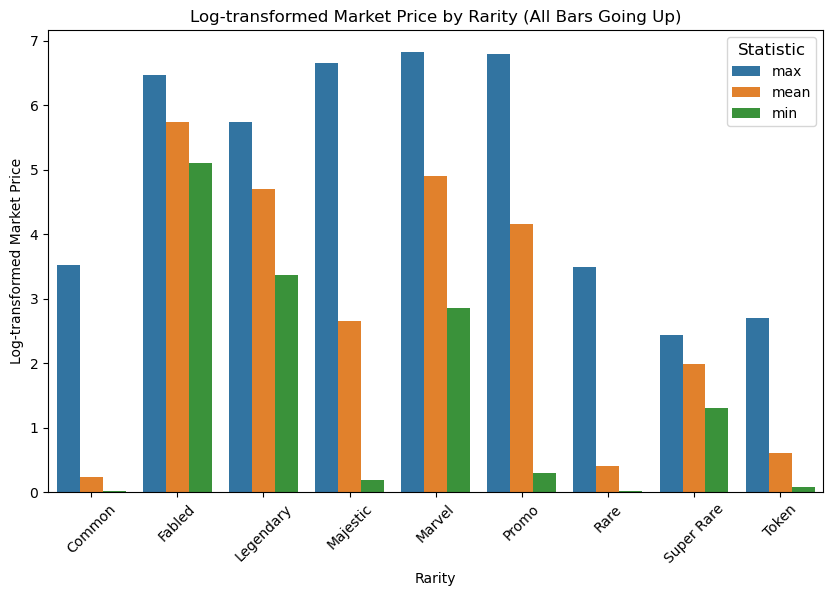

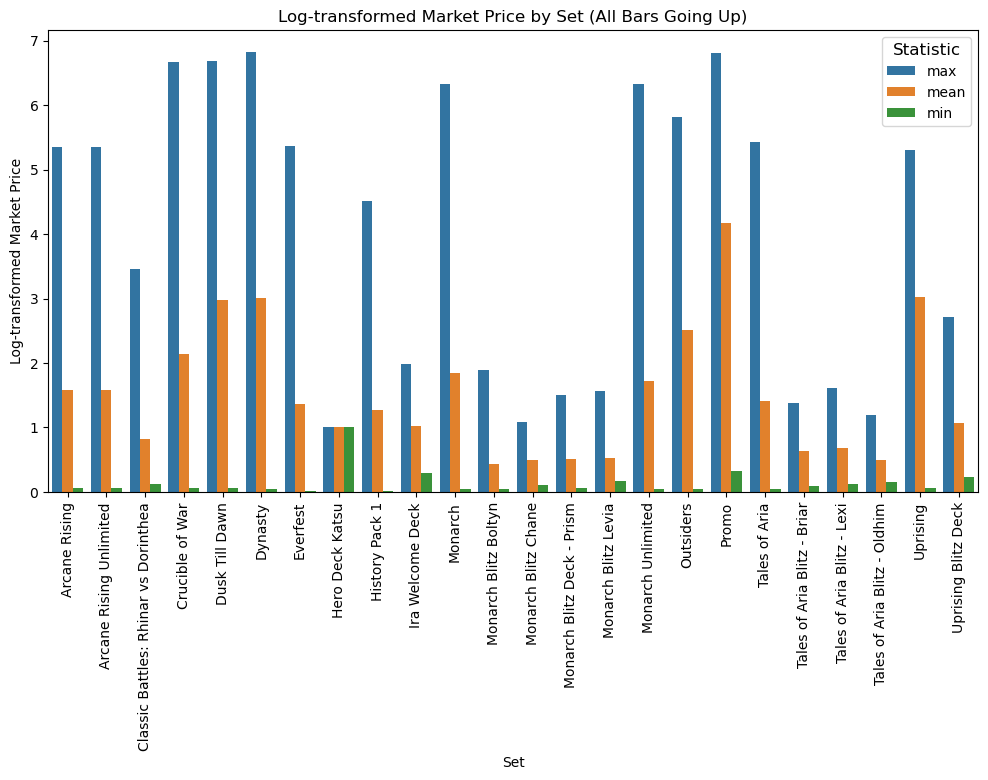

In [18]:
# Apply log transformation to the 'price' column, but avoid negative values
pivot_table_rarity_long['log_price'] = np.log(pivot_table_rarity_long['price'] + abs(pivot_table_rarity_long['price'].min()) + 1)
pivot_table_set_long['log_price'] = np.log(pivot_table_set_long['price'] + abs(pivot_table_set_long['price'].min()) + 1)

# Create bar plots for each statistic separately for rarity with log-transformed y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x='rarity', y='log_price', hue='statistic', data=pivot_table_rarity_long)
plt.title('Log-transformed Market Price by Rarity (All Bars Going Up)')
plt.xlabel('Rarity')
plt.ylabel('Log-transformed Market Price')
plt.xticks(rotation=45)
plt.legend(title='Statistic', title_fontsize='12')
plt.show()

# Create bar plots for each statistic separately for set with log-transformed y-axis
plt.figure(figsize=(12, 6))
sns.barplot(x='set', y='log_price', hue='statistic', data=pivot_table_set_long)
plt.title('Log-transformed Market Price by Set (All Bars Going Up)')
plt.xlabel('Set')
plt.ylabel('Log-transformed Market Price')
plt.xticks(rotation=90)
plt.legend(title='Statistic', title_fontsize='12')
plt.show()


Before this analysis I thought all of the older sets that have unlimnited by their names would be the most expensive. Because they have older highly sought after cards. I also thought some of the sets that have first editions would be at the top of the pack, but I was wrong. Newer sets are showing much higher prices than anticipated. The most interesting finding I noticed was the relative closenesss in price between sets. When you look at the values for sets that aren't premade decks you see that the values aren't all that different. Flesh and Blood TCG is a company run around playing the game. They do not focus as heavily on collecibility and the secondary market unlike other similar Trading Card Games. IE: Pokemon, Magic the Gathering. This game's promo cards can only be gotten by playing, rare foil treatments are only in the sets that are released or promos for playing as well. So it goes to show that what the creators of the game say is backed up by this data. In other games you'd see some sets with ridiculously high values, and some with extraordinarily low ones. This game is well designed and balanced so that the gameplay fuels prices. I am also very surprised the sum of the tokens and even common cards is as high as it is. Using the logarithmic scaling helped really bring this data closer together so the patterns could be noticed more easily. 